# Minimax

In this notebook we shall investigate the MiniMax algorithm for
_adversarial games_ and see how it can be coded in Python.


MiniMax is a a recursive procedure for calculating
the value of a move based on the evaluation of subsequent
moves. Since moves alternate between our player and the opponent, the
calculation alternates between taking the maximum and the
minimum of the values calculated for the following state.
Moving to position with highest _minimax value_
gives best achievable payoff assuming that the opponent
always makes their best play.
It gives perfect play for deterministic, perfect-information games.

## Minimax implementation of Tic-tac-toe (Naughts and Crosses)


#### Representing and displaying the game state

To implement a MimiMax based AI algorithm for playing tic-tac-toe we need a representation
of the game state and possible plays that can be made for any given state.

* The board will be a list of 9 items, initially set to `[1,2,3,4,5,6,7,8,9]`.
  In this representation we are starting the board in the top left at 1, and counting row
  by row up to 9. (This is probably more intuitive for most people than going 0 to 8.)
  
* When `0` and `X` symbols are added to the board these are simply represented by the
  strings `'0'` and `'X'` being substituted in place of the number at the corresponding
  possition.

#### Displaying the game state using `matplotlib`
It will useful to see a representation of the progress of the game.
We can use matplotlib to give a nice image of any game state.

In [1]:
import matplotlib.pyplot as plt

plt.ioff()  ## Turn off immediate display of plots

def board_figure(board):  
    fig, ax = plt.subplots(figsize=(3,3))
    plt.close(fig)
    ax.set_axis_off() # Don't show border lines and coordinate values
    
    # draw O and X symbols on the board graphic
    for i, square in enumerate(board):
        (x,y) =  (i%3,  2 - i//3)     # transform the square number into x,y coords
        if board[i] == '0':
            ax.plot(x,y,'o',markersize=30, markerfacecolor='w',  # w means white
                    markeredgecolor='k', markeredgewidth=3)      # k means black
        elif board[i] == 'X':
            ax.plot(x,y,'x',markersize=30, markeredgecolor='k', markeredgewidth=3)
        else:
            ax.text(x,y, i+1,
                    fontsize = 15, verticalalignment='center', horizontalalignment='center',)

    # draw the grid (lines are half a unit either side of the square centres)
    for x in (1,2):
        ax.plot([x-0.5, x-0.5], [-0.5,2.5], 'k')  
    for y in (1,2):
        ax.plot([-0.5, 2.5], [y-0.5,y-0.5], 'k')    
    return fig
    
def display_board( board ):
    display( board_figure(board) )
    

The following call to `display_board` tests that it is correctly displaying a board state:

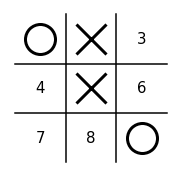

In [2]:
display_board( ['0','X',3,4,'X',6,7,8,'0'] )

#### The _state successor_ function

In order to look ahead at future states of the game we will need a way to calculate what
are the possible next states that can come after a given state (in accordance with the
rule of the game). In AI we usually describe the possible next states after state $s$
as the _successors_ of $s$, and a function that gives the successors of any state is
called a _state successor function_. The state successor function for tic-tac-toe
can be defined as below. The function first finds whose turn it is to play (by convention
X goes first, so it will only be 0's turn to play when there are fewer 0s than Xs).
It then creates a list of all successor states which will have one of the empty squares
filled with the players symbol.

In [3]:
def successors(board):
    if board.count('0') < board.count('X'):
        player = '0'
    else:
        player = 'X'

    sucs = []
    for i, val in enumerate(board):
        if val == '0' or val == 'X':
            continue # That place is taken
        #copy = [v for v in board]
        copy = board.copy()
        copy[i] = player
        sucs.append(copy)
    
    return sucs

In [7]:
#for b in successors( ['0','X',3,4,'X',6,7,8,'0'] ):
#    display_board(b)


In [11]:
all([True, True, True])

True

#### Checking if the game has ended

Another thing we need to implement the MinMaxi is some tests to see
if anyone has won the game or if it is a draw. These can be coded as follows.

In [15]:
LINES = [[1,2,3], [4,5,6], [7,8,9],
         [1,4,7], [2,5,8], [3,6,9],
         [1,5,9], [3,5,7] ]
        # The numbers are 1 more than the index in the list of 9 places.
                
def winner( board ):
        for player in ['0', 'X']:
            if any( [ all([board[i-1] == player for i in line])
                      for line in LINES ] 
                  ):
                return player                

def draw( board ):
    return all( [i=='0' or i=='X' for i in board] )

Notice that in defining the winning conditions, the lines of 3 in a row have been
specified by simply declaring which triples of board positions are lines. This
is probably less error-prone than algorithmic ways of specifying the winning
moves. 
Note the use of Python's `all` operation, which can be used to check that all elements
of a list are `True`. Used in combination with list comprehension, to create a list
of test results, this is a very neat way to code up tests that depend on a number
of other tests. 

It will also be useful to have a function that checkes whether the game has
ended (as either a win for one player or a draw) and prints an appropriate message:

In [19]:
def game_end(board):
    w = winner(board)
    if w:
        print(w, "wins!")
        return True
    if draw(board):
        print("It's a DRAW")
        return True
    return False

#### Test the code by generating a random game sequence

Now we have these functions, we can already do a test on whether the code
correctly enforces the rules, by generating a random game.
This is done by the following simple code, which you can try running:

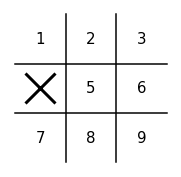

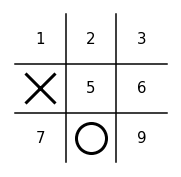

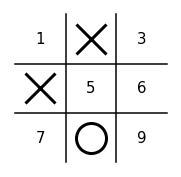

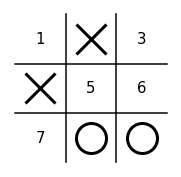

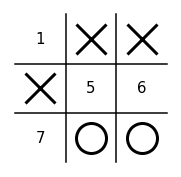

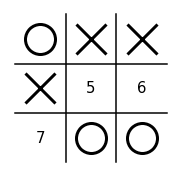

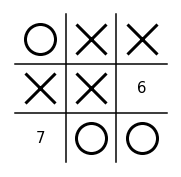

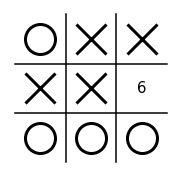

0 wins!


In [24]:
import random

board = [1,2,3,4,5,6,7,8,9]

while True:
    if game_end(board):
        break
    sucs = successors(board)
    board = random.choice(sucs)
    display_board(board)


## Coding the AI using MiniMax

Now we can encode the actual MiniMax calculation that will drive the AI system.
This can actually be done very concisely. Here are a few notes that will help
you undertand it:

* The value calculation is always from the point of view of the AI player.
* `final_val` will return `1` if the AI wins `-1` if the human wins and
  `0` if it is a draw. If none of these hold, it will return `None`.
  
* `min_val` and `max_val` both return `final_val` unless it is `None`.

* For non-final states, `min_val` and `max_val` are _mutually_recursive_ (i.e. they call each other):
    * `min_val` returns the minimum of the values returned by `max_val` for
        each successor state;
    * `max_val` returns the maximum of the values returned by `min_val` for
        each successor state.

In [25]:
AI_player = 'X'

def final_val(state):
    human = '0' if AI_player == 'X' else 'X'
    w = winner(state)
    if w == AI_player: return 1
    if w == human:     return -1
    if draw(state):     return  0

def min_val(state):
    finval = final_val(state)
    if finval==None: 
        return min( [max_val(suc) for suc in successors(state)] )
    else:
        return finval    
    
def max_val(state):
    finval = final_val(state)
    if finval==None: 
        return max( [min_val(suc) for suc in successors(state)] )
    else:
        return finval

#### Choosing the best move
MiniMax just gives the value of a game state (for the AI). But to play
the game the AI needs to know what moves to pick. Hence it should
call minimax on the following states to see how good they are and
pick the best one. More specifically it will call 'min_val' on
all the successors (since the opponent will be trying to make
the outcome after them as bad as possible for the AI player) and 
then choose the one with the highest value, which will maximise
the chance of the AI to win. Hence, the 

In [26]:
def ai_choose_move(state):
    # Get list of (value, move) pairs for all successor states
    value_moves = [ (min_val(s),s) for s in successors(state)]
    value_moves.sort(key=lambda x:x[0], reverse=True) # sort moves by value
    print("Move evaluation:", value_moves) # Print the next move evaluations for info
    return value_moves[0][1]               # return highest value move

#### A _self_play_ test
For an initial test of the AI we can try playing it against itself.
The following code does that. You should find that it wins every time. 
However, it is not really a proper test of the AI. Why is that?
(You can see the answer if you look at the question in the 
**Adverserial Games** lecture, under the links to this notebook
exercise.)

Move evaluation: [(0, ['X', 2, 3, 4, 5, 6, 7, 8, 9]), (0, [1, 'X', 3, 4, 5, 6, 7, 8, 9]), (0, [1, 2, 'X', 4, 5, 6, 7, 8, 9]), (0, [1, 2, 3, 'X', 5, 6, 7, 8, 9]), (0, [1, 2, 3, 4, 'X', 6, 7, 8, 9]), (0, [1, 2, 3, 4, 5, 'X', 7, 8, 9]), (0, [1, 2, 3, 4, 5, 6, 'X', 8, 9]), (0, [1, 2, 3, 4, 5, 6, 7, 'X', 9]), (0, [1, 2, 3, 4, 5, 6, 7, 8, 'X'])]


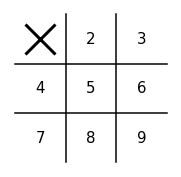

Move evaluation: [(1, ['X', '0', 3, 4, 5, 6, 7, 8, 9]), (1, ['X', 2, 3, '0', 5, 6, 7, 8, 9]), (1, ['X', 2, 3, 4, 5, '0', 7, 8, 9]), (1, ['X', 2, 3, 4, 5, 6, 7, '0', 9]), (0, ['X', 2, '0', 4, 5, 6, 7, 8, 9]), (0, ['X', 2, 3, 4, '0', 6, 7, 8, 9]), (0, ['X', 2, 3, 4, 5, 6, '0', 8, 9]), (0, ['X', 2, 3, 4, 5, 6, 7, 8, '0'])]


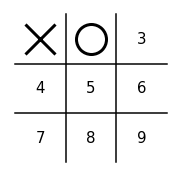

Move evaluation: [(1, ['X', '0', 3, 'X', 5, 6, 7, 8, 9]), (1, ['X', '0', 3, 4, 'X', 6, 7, 8, 9]), (1, ['X', '0', 3, 4, 5, 6, 'X', 8, 9]), (0, ['X', '0', 'X', 4, 5, 6, 7, 8, 9]), (0, ['X', '0', 3, 4, 5, 'X', 7, 8, 9]), (0, ['X', '0', 3, 4, 5, 6, 7, 'X', 9]), (0, ['X', '0', 3, 4, 5, 6, 7, 8, 'X'])]


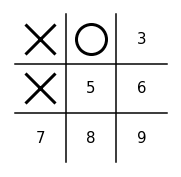

Move evaluation: [(1, ['X', '0', '0', 'X', 5, 6, 7, 8, 9]), (1, ['X', '0', 3, 'X', 5, '0', 7, 8, 9]), (1, ['X', '0', 3, 'X', 5, 6, 7, '0', 9]), (1, ['X', '0', 3, 'X', 5, 6, 7, 8, '0']), (0, ['X', '0', 3, 'X', '0', 6, 7, 8, 9]), (0, ['X', '0', 3, 'X', 5, 6, '0', 8, 9])]


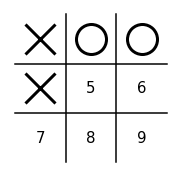

Move evaluation: [(1, ['X', '0', '0', 'X', 'X', 6, 7, 8, 9]), (1, ['X', '0', '0', 'X', 5, 'X', 7, 8, 9]), (1, ['X', '0', '0', 'X', 5, 6, 'X', 8, 9]), (1, ['X', '0', '0', 'X', 5, 6, 7, 'X', 9]), (1, ['X', '0', '0', 'X', 5, 6, 7, 8, 'X'])]


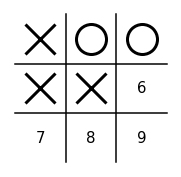

Move evaluation: [(1, ['X', '0', '0', 'X', 'X', '0', 7, 8, 9]), (1, ['X', '0', '0', 'X', 'X', 6, '0', 8, 9]), (1, ['X', '0', '0', 'X', 'X', 6, 7, '0', 9]), (1, ['X', '0', '0', 'X', 'X', 6, 7, 8, '0'])]


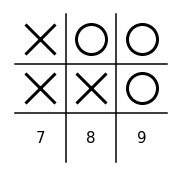

Move evaluation: [(1, ['X', '0', '0', 'X', 'X', '0', 'X', 8, 9]), (1, ['X', '0', '0', 'X', 'X', '0', 7, 8, 'X']), (-1, ['X', '0', '0', 'X', 'X', '0', 7, 'X', 9])]


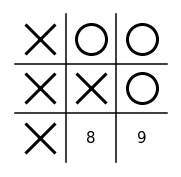

X wins!


In [28]:
def self_play():
    board = [1,2,3,4,5,6,7,8,9]
    while True:
        board = ai_choose_move(board)
        display_board(board)
        if game_end(board):
            break

self_play()            

### Interface for the AI to play against a human

The AI is thinking ...
Move evaluation: [(0, ['X', 2, 3, 4, 5, 6, 7, 8, 9]), (0, [1, 'X', 3, 4, 5, 6, 7, 8, 9]), (0, [1, 2, 'X', 4, 5, 6, 7, 8, 9]), (0, [1, 2, 3, 'X', 5, 6, 7, 8, 9]), (0, [1, 2, 3, 4, 'X', 6, 7, 8, 9]), (0, [1, 2, 3, 4, 5, 'X', 7, 8, 9]), (0, [1, 2, 3, 4, 5, 6, 'X', 8, 9]), (0, [1, 2, 3, 4, 5, 6, 7, 'X', 9]), (0, [1, 2, 3, 4, 5, 6, 7, 8, 'X'])]


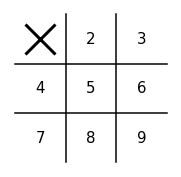

Choose your move:4


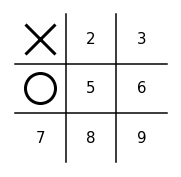

The AI is thinking ...
Move evaluation: [(1, ['X', 'X', 3, '0', 5, 6, 7, 8, 9]), (1, ['X', 2, 'X', '0', 5, 6, 7, 8, 9]), (1, ['X', 2, 3, '0', 'X', 6, 7, 8, 9]), (0, ['X', 2, 3, '0', 5, 'X', 7, 8, 9]), (0, ['X', 2, 3, '0', 5, 6, 'X', 8, 9]), (0, ['X', 2, 3, '0', 5, 6, 7, 'X', 9]), (0, ['X', 2, 3, '0', 5, 6, 7, 8, 'X'])]


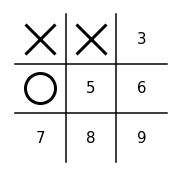

Choose your move:3


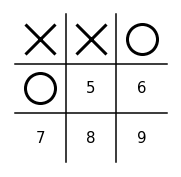

The AI is thinking ...
Move evaluation: [(1, ['X', 'X', '0', '0', 'X', 6, 7, 8, 9]), (0, ['X', 'X', '0', '0', 5, 'X', 7, 8, 9]), (-1, ['X', 'X', '0', '0', 5, 6, 'X', 8, 9]), (-1, ['X', 'X', '0', '0', 5, 6, 7, 'X', 9]), (-1, ['X', 'X', '0', '0', 5, 6, 7, 8, 'X'])]


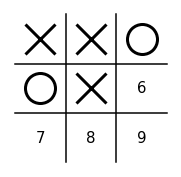

Choose your move:9


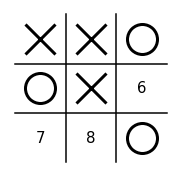

The AI is thinking ...
Move evaluation: [(1, ['X', 'X', '0', '0', 'X', 6, 7, 'X', '0']), (0, ['X', 'X', '0', '0', 'X', 'X', 7, 8, '0']), (-1, ['X', 'X', '0', '0', 'X', 6, 'X', 8, '0'])]


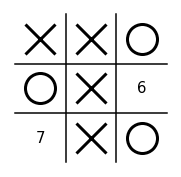

X wins!


In [30]:
AI_player = 'X'

def ai_move(board):
    print("The AI is thinking ...")
    return ai_choose_move(board)

def human_move(board):
    choice = input("Choose your move:")
    index = int(choice) -1
    board[index] = '0' if AI_player == 'X' else 'X'
    return board

def play_against_ai( human_first=False ):
    board = [1,2,3,4,5,6,7,8,9]
    
    if human_first:
        global AI_player
        AI_player = '0'
        display_board(board)
        board=human_move(board)
        display_board(board)
        
    while True:
        board = ai_move(board)
        display_board(board)
        if game_end(board): break
        human_move(board)
        display_board(board)
        if game_end(board): break


play_against_ai()
#play_against_ai( human_first = True)


## Possible Further Work

If you want to gain a deeper undersatnding of Game AI and MiniMax, the best
way to do that would be to try to implement your own game playing AI system.
You should start with something quite simple but perhaps a littel more
complex that tic-tac-toe. A suitable option might be the game
[Tac-tickle](https://nrich.maths.org/1240).
